<h2>Import libraries</h2>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb

In [2]:
# Get and load dataset
data = pd.read_csv("data.csv")

In [3]:
#View dataset
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
3,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13.4
4,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2


In [4]:
data.shape

(404, 14)

In [5]:
# Check for any missing values
data.isna().any().any()

False

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351,22.796535
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381,9.332147
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500,16.950000
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000,21.600000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500,26.400000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<h2>EDA</h2>

In [7]:
# Check for missing values
data.isna().any().any()

False

There are no missing values

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

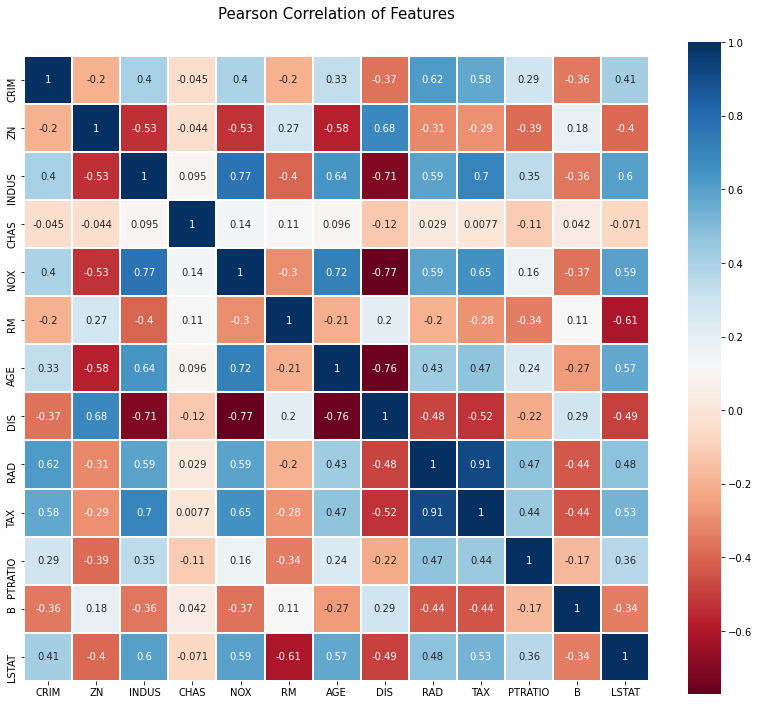

In [8]:
# Plot a correlation map to see for correlation between features
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.drop(columns=['MEDV']).astype(float).corr(), linewidths=0.1, vmax=1.0,
    square=True, cmap=colormap, linecolor='white', annot=True)

There seems to be a good amount of correlation between 'TAX' and 'RAD' feautures.

Both features will be merged together.

In [9]:
data['RAD_TAX'] = data['RAD']*0.5 + data['TAX']*0.5

data.drop(columns=['RAD', 'TAX'], inplace=True)

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,MEDV,RAD_TAX
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,20.2,349.48,24.91,12.0,345.0
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,21.0,395.62,8.47,19.9,155.5
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,16.9,362.25,7.83,19.4,152.5
3,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,20.2,2.52,23.29,13.4,345.0
4,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,21.0,390.95,11.28,18.2,155.5


Let's plot graphs to see how the features changes with town.

<h2>Feature plots</h2>

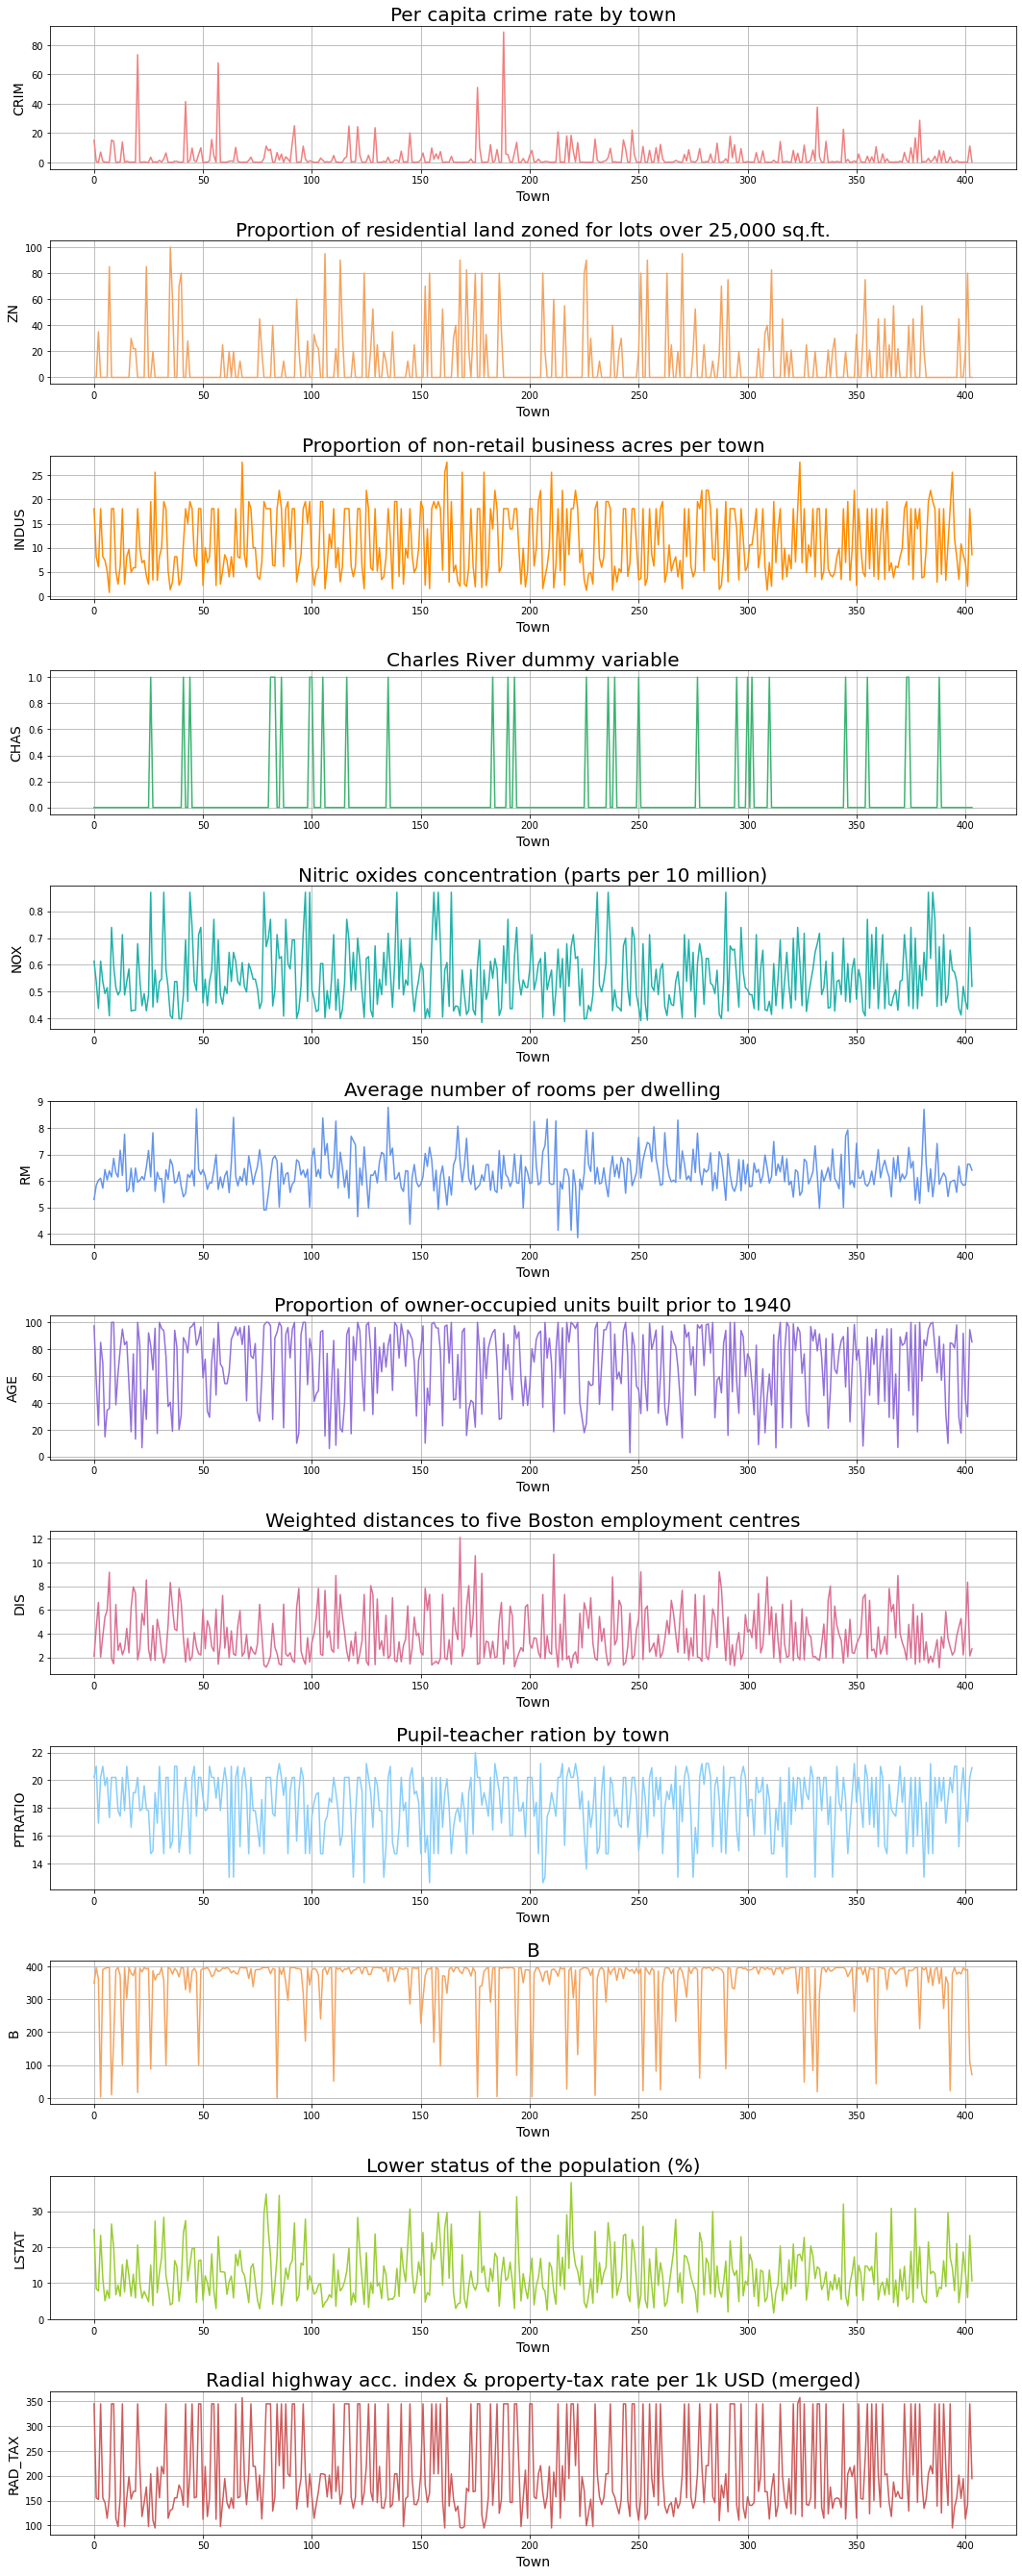

In [10]:
town_indices = list(data.index)

fig, ax = plt.subplots(figsize=(18, 48), nrows=12, ncols=1)

plt.subplots_adjust(hspace=0.5)

columns = data.drop(columns=['MEDV']).columns

colors = ["lightcoral", "sandybrown", "darkorange", "mediumseagreen",
          "lightseagreen", "cornflowerblue", "mediumpurple", "palevioletred",
          "lightskyblue", "sandybrown", "yellowgreen", "indianred"]

titles = ['Per capita crime rate by town',
          'Proportion of residential land zoned for lots over 25,000 sq.ft.',
          'Proportion of non-retail business acres per town', 
          'Charles River dummy variable',
          'Nitric oxides concentration (parts per 10 million)',
          'Average number of rooms per dwelling',
          'Proportion of owner-occupied units built prior to 1940',
          'Weighted distances to five Boston employment centres',
          'Pupil-teacher ration by town',
          'B',
          'Lower status of the population (%)',
          'Radial highway acc. index & property-tax rate per 1k USD (merged)']

for i in range(len(columns)):
    ax[i].plot(town_indices, data[columns[i]], color=colors[i])
    ax[i].set_title(titles[i], fontsize=20, pad=5)
    ax[i].set_ylabel(columns[i], fontsize=14, labelpad=5)
    ax[i].set_xlabel('Town', fontsize=14, labelpad=5)
    #ax[i].set_xticks(town_indices)
    ax[i].grid(axis='both')

plt.show()

<h2>Model training</h2>

An eXtreme Gradient Boosting Regressor will be used here (xgboost).

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['MEDV']),
                                                    data['MEDV'].to_numpy().reshape((-1, 1)),
                                                    test_size=0.2)

In [12]:
model = xgb.XGBRegressor(
    n_estimators=1000,
    max_depth=4,
    verbosity=1,
)

model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [13]:
model.score(X_train, y_train)

0.9999999756813093

In [14]:
model.score(X_test, y_test)

0.9081342010084809

<h2>Model Evaluation</h2>

In [15]:
y_train_length = len(y_train)

Let's visualize how close our actual and predicted values are. for both train and test dataset.

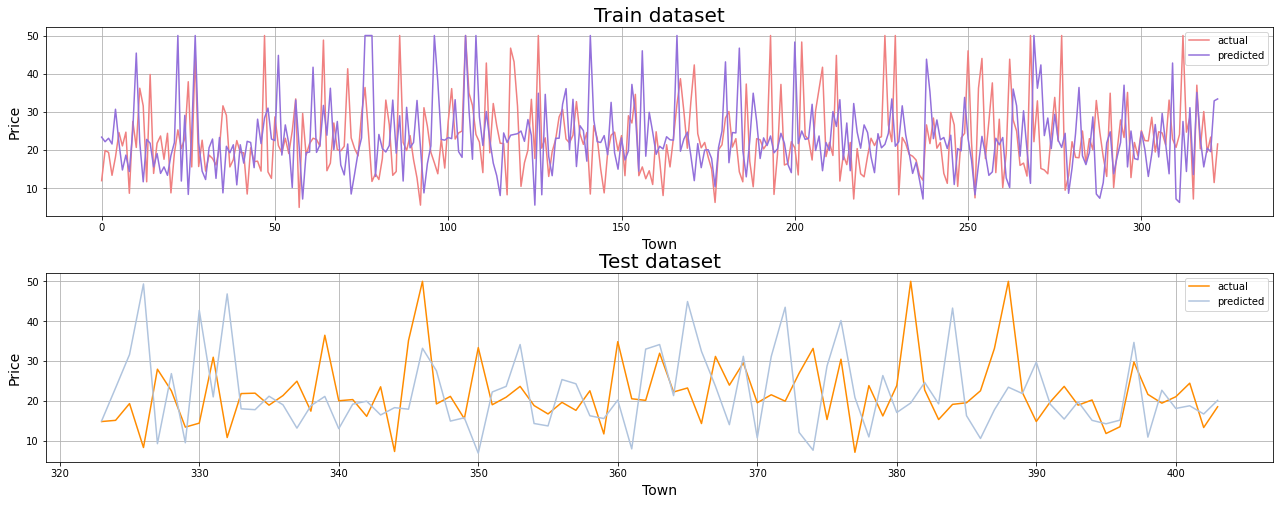

In [22]:
y_from_data = data['MEDV'].to_numpy().reshape((-1, 1))
y_for_train = y_from_data[:y_train_length]
y_for_test = y_from_data[y_train_length:]

# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

fig, ax = plt.subplots(figsize=(22, 8), nrows=2, ncols=1)

plt.subplots_adjust(hspace=0.3)

# ax[0].scatter(y_train_pred, y_for_train, color='b')
# ax[0].set_title('Train dataset', fontsize=20, pad=5)
# ax[0].set_ylabel('Actual', fontsize=14, labelpad=5)
# ax[0].set_xlabel('Predicted', fontsize=14, labelpad=5)
# ax[0].legend(['actual', 'predicted'])

# ax[1].scatter(y_test_pred, y_for_test, color='r')
# ax[1].set_title('Test dataset', fontsize=20, pad=5)
# ax[1].set_ylabel('Actual', fontsize=14, labelpad=5)
# ax[1].set_xlabel('Predicted', fontsize=14, labelpad=5)
# ax[1].legend(['actual', 'predicted'])

ax[0].plot(data.index[:y_train_length], y_for_train, color='lightcoral')
ax[0].plot(data.index[:y_train_length], y_train_pred, color='mediumpurple')
ax[0].set_title('Train dataset', fontsize=20, pad=5)
ax[0].set_ylabel('Price', fontsize=14, labelpad=5)
ax[0].set_xlabel('Town', fontsize=14, labelpad=5)
ax[0].grid(axis='both')
ax[0].legend(['actual', 'predicted'])

ax[1].plot(data.index[y_train_length:], y_for_test, color='darkorange')
ax[1].plot(data.index[y_train_length:], y_test_pred, color='lightsteelblue')
ax[1].set_title('Test dataset', fontsize=20, pad=5)
ax[1].set_ylabel('Price', fontsize=14, labelpad=5)
ax[1].set_xlabel('Town', fontsize=14, labelpad=5)
ax[1].grid(axis='both')
ax[1].legend(['actual', 'predicted'])

plt.show()